# ツリーモデル

## やってみよう

In [29]:
library(rpart)

In [30]:
iris.rp = rpart(Species ~ ., data = iris)

In [31]:
print(iris.rp, digits = 2)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.333 0.333 0.333)  
  2) Petal.Length< 2.5 50   0 setosa (1.000 0.000 0.000) *
  3) Petal.Length>=2.5 100  50 versicolor (0.000 0.500 0.500)  
    6) Petal.Width< 1.8 54   5 versicolor (0.000 0.907 0.093) *
    7) Petal.Width>=1.8 46   1 virginica (0.000 0.022 0.978) *


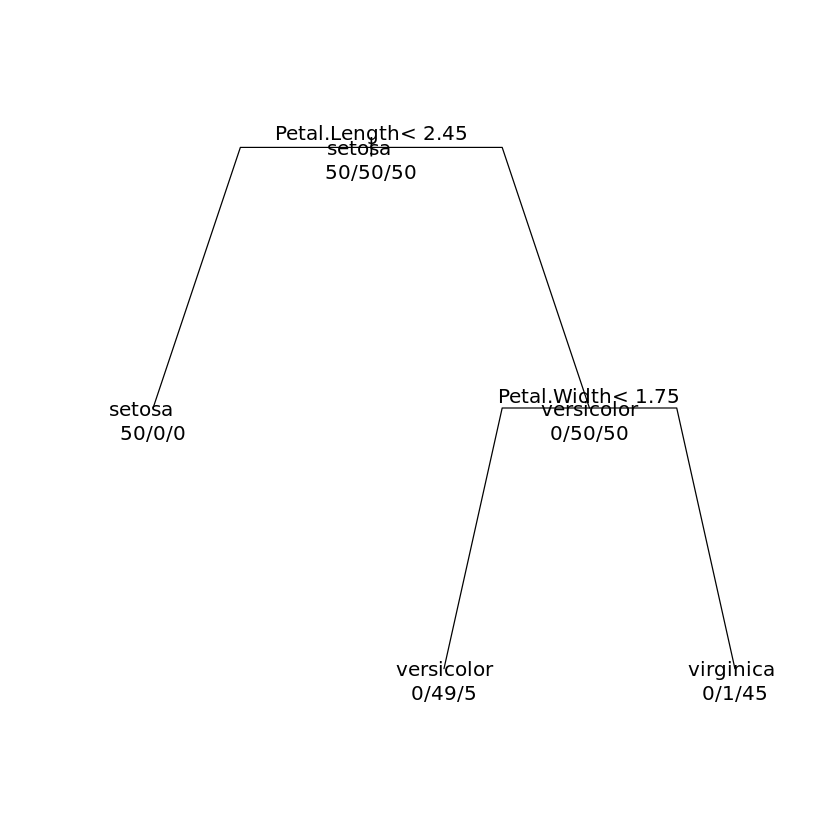

In [32]:
plot(iris.rp, uniform = T, branch = 0.6, margin = 0.05)
text(iris.rp, use.n = T, all = T)

In [33]:
printcp(iris.rp)


Classification tree:
rpart(formula = Species ~ ., data = iris)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 100/150 = 0.66667

n= 150 

    CP nsplit rel error xerror     xstd
1 0.50      0      1.00   1.16 0.051277
2 0.44      1      0.50   0.73 0.061215
3 0.01      2      0.06   0.08 0.027520



Classification tree:
rpart(formula = Species ~ ., data = iris, cp = 0, minsplit = 3)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width  Sepal.Length

Root node error: 100/150 = 0.66667

n= 150 

     CP nsplit rel error xerror     xstd
1 0.500      0      1.00   1.16 0.051277
2 0.440      1      0.50   0.65 0.060690
3 0.020      2      0.06   0.07 0.025833
4 0.010      3      0.04   0.07 0.025833
5 0.005      6      0.01   0.07 0.025833
6 0.000      8      0.00   0.07 0.025833


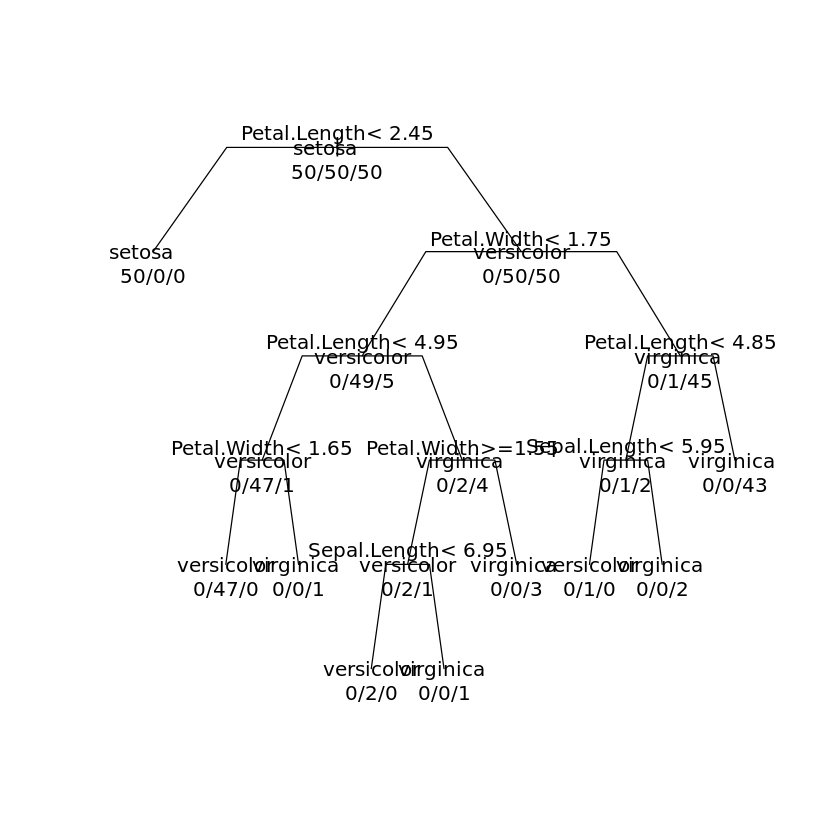

In [40]:
set.seed(0)
iris.rp2 = rpart(Species ~ ., data = iris, cp = 0, minsplit = 3)
printcp(iris.rp2)
plot(iris.rp2, uniform = T, branch = 0.6, margin = 0.05)
text(iris.rp2, use.n = T, all = T)

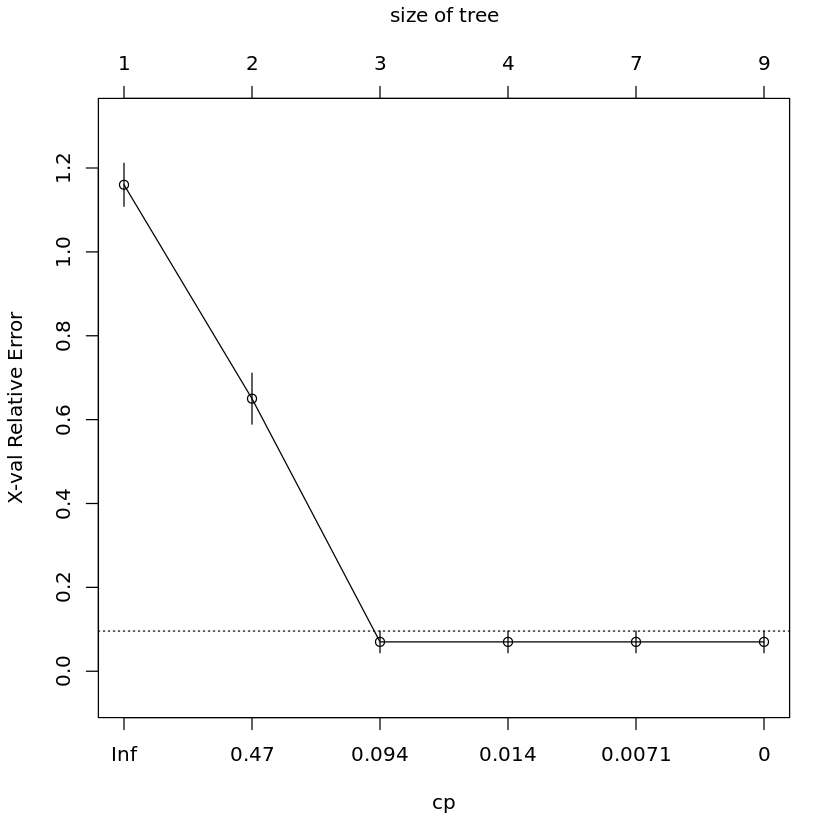

In [41]:
plotcp(iris.rp2)
# 表の点線あたりで終了するといいみたい

In [48]:
iris.rp3 = prune(iris.rp2, cp = 0.094)
print(iris.rp3)

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *


## 判別

In [50]:
iris.lab <- c(rep("S", 50), rep("C", 50), rep("V", 50))
iris1 <- data.frame(iris[, 1:4], Species = iris.lab)
even.n <- 2 * (1:75) - 1
iris.train <- iris1[even.n, ]
iris.test <- iris1[-even.n, ]

In [57]:
iris.rp4 = rpart(Species ~ ., iris.train)
iris.rp5 = predict(iris.rp4, iris.test[, -5], type = "class")
printcp(iris.rp4)
table(iris.test[, 5], iris.rp5)


Classification tree:
rpart(formula = Species ~ ., data = iris.train)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 50/75 = 0.66667

n= 75 

    CP nsplit rel error xerror     xstd
1 0.50      0      1.00   1.22 0.067488
2 0.46      1      0.50   0.80 0.086410
3 0.01      2      0.04   0.10 0.043205


   iris.rp5
     C  S  V
  C 24  0  1
  S  0 25  0
  V  3  0 22

## プロットしてみよう

In [60]:
install.packages("rpart.plot")

Installing package into ‘/home/ayumuogawa0616/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in install.packages("rpart.plot"):
“installation of package ‘rpart.plot’ had non-zero exit status”


In [61]:
library(rpart.plot)

In [62]:
op = par(mfrow = c(2, 2))

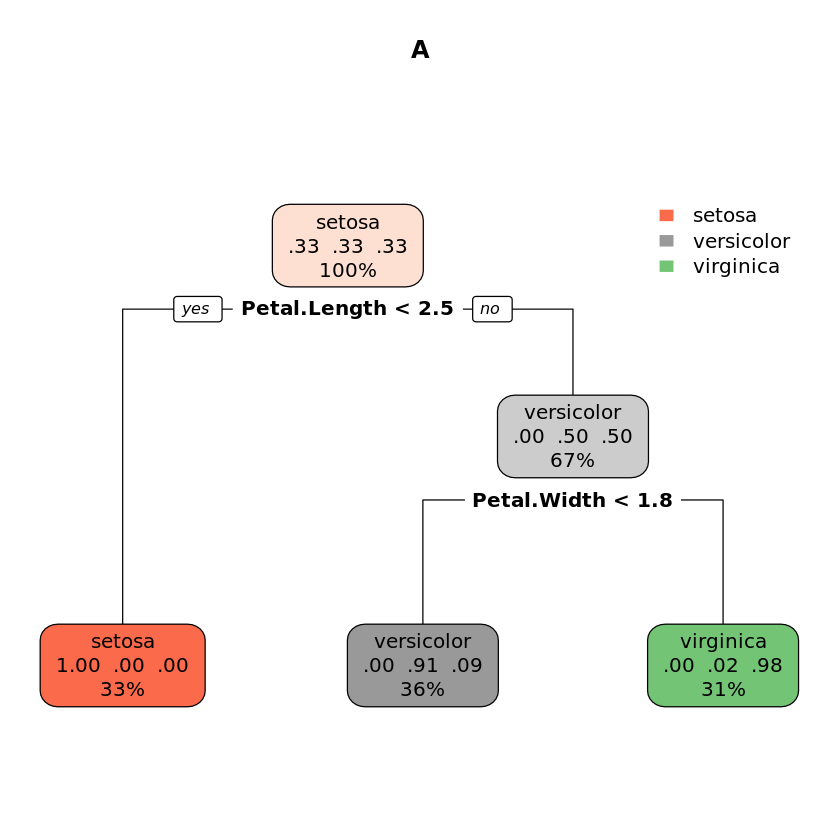

In [64]:
rpart.plot(iris.rp, main = "A")

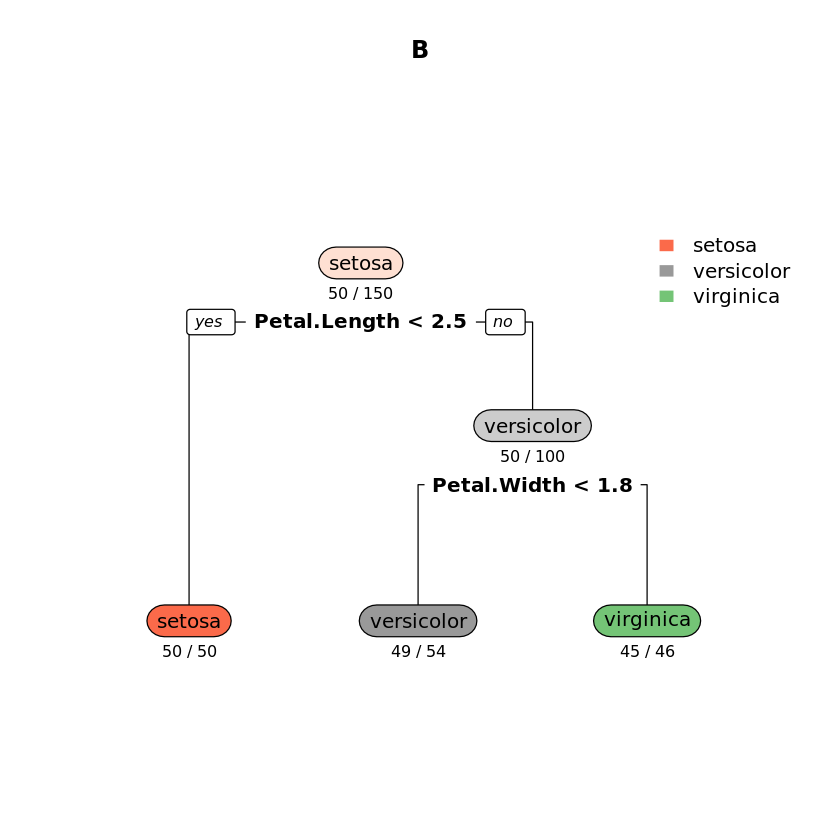

In [66]:
rpart.plot(iris.rp, extra = 1, under = TRUE, main = "B")

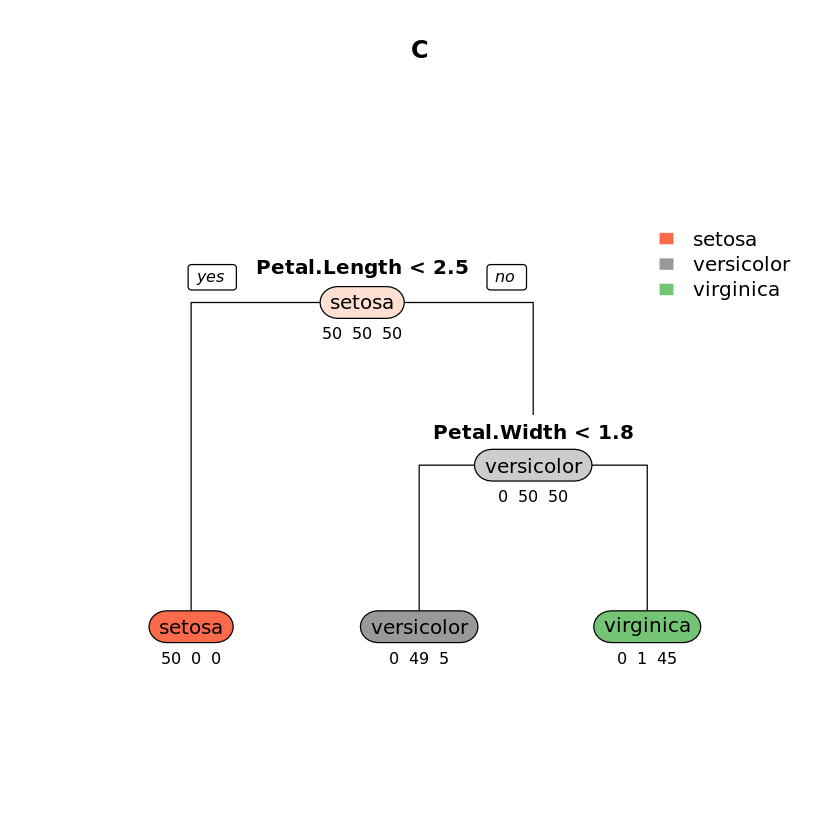

In [68]:
rpart.plot(iris.rp, extra = 1, type = 1, under = TRUE, main = "C")

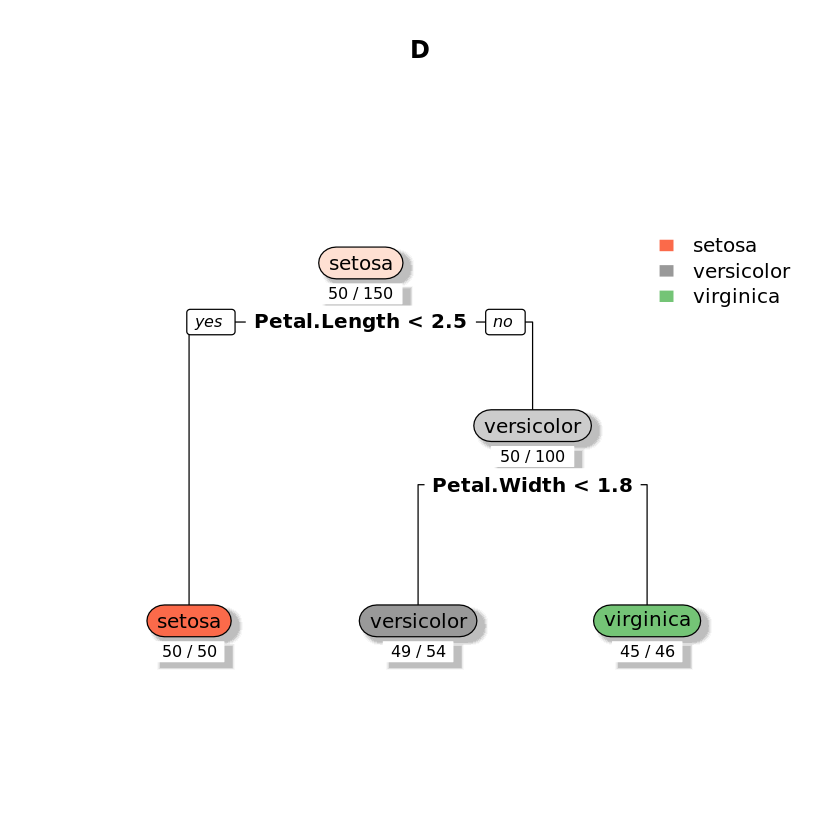

In [70]:
rpart.plot(iris.rp, extra = 2, type = 2, shadow.col = "gray", under = TRUE, main = "D")